In [1]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import pdb

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal

import sys
import time
from IPython.display import display, clear_output

from tqdm.auto import tqdm

from rlutils import ReturnTracker, HistoryWriter
from sac import SoftActorCritic
from envs import OptimizationEnv

In [2]:
torch.cuda.is_available()

False

In [3]:
env = OptimizationEnv(continuous=True)

/Users/felix/.pyenv/versions/3.8.6/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [4]:
env.params

{'x0': array([[ 0.47873305, -0.21699543]]),
 'k': array([1.05621856]),
 'noise': 0.008540822478017724}

In [5]:
observation, info = env.reset()

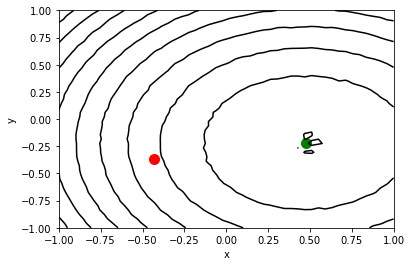

In [6]:
env.render()

In [7]:
np.random.choice([64], 10)

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

In [8]:
np.random.choice(64, 10)

array([26, 12, 17, 13, 47, 10, 63, 18,  8, 28])

In [9]:
agent = SoftActorCritic(env, lr=1e-2, gamma=.99, batch_size=64, gradient_steps=8,
                    device='cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
tracker = ReturnTracker()
writer = HistoryWriter()

In [11]:
agent.learn(episodes=1,
            episode_steps=100, 
            two_pbars=False,
            tracker=tracker,
            writer=writer)

  0%|          | 0/1 [00:00<?, ?it/s]

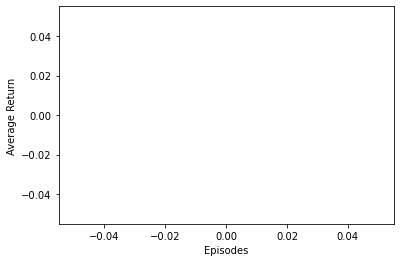

In [12]:
tracker.plot(smooth=1)

Greedy action is [[ 0.47294226 -0.22441293]] with likelihood [[18.002499]]
steps: 9, returns: 0.02633046758474451
terminated False 0.013018033165166178 0.008540822478017724


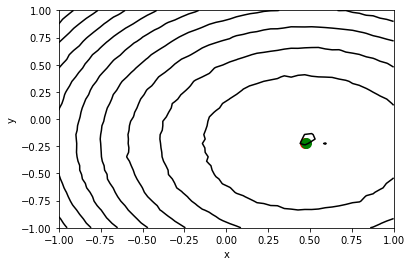

KeyboardInterrupt: 

In [13]:
# test
while True:
    
    terminated, truncated = False, False
    
    state, info = env.reset(new_params=False)
    
    env.render()
    
    steps = 0
    returns = 0
    
    while not terminated and not truncated:

        time.sleep(.5)
        clear_output(wait=True)

        action, likelihood = agent.predict(state)
        new_state, reward, terminated, truncated, info = env.step(action.flatten())
        print('Greedy action is {} with likelihood {}'.format(action, np.exp(likelihood)))

        steps += 1
        state = torch.tensor(new_state)
        returns += reward
        
        print('steps: {}, returns: {}'.format(steps, returns))
        print('terminated', terminated, reward, env.params['noise'])

        env.render()
        sys.stdout.flush()
        
        if steps > 10:
            break
    
    time.sleep(1.)

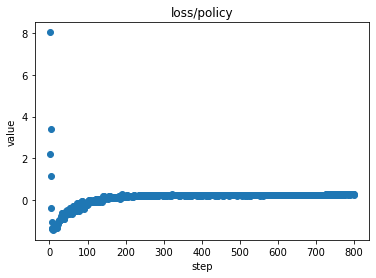

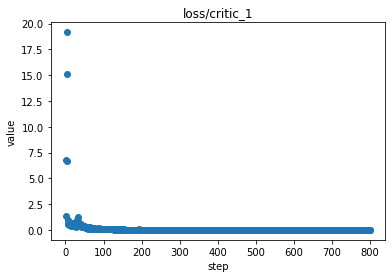

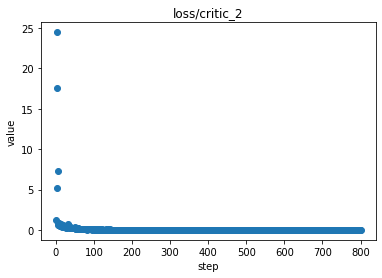

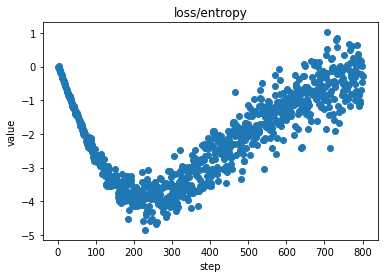

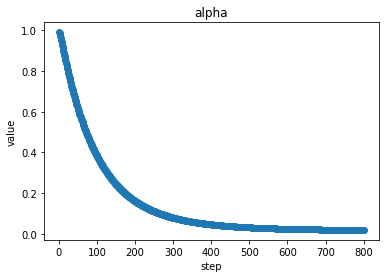

In [14]:
for key in writer.history.keys():
    writer.plot(key)

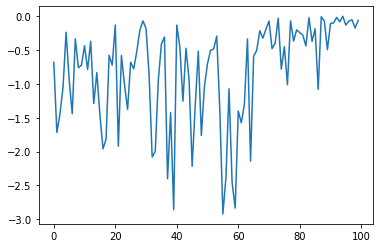

In [15]:
plt.plot(agent.buffer.reward_memory[:100])